In [1]:
import numpy as np
import pandas as pd

In [2]:
delivery = pd.read_csv(r'C:\Users\rajath.k\Downloads\Tasks\Task3-diminos_data_v2\deliveries.csv')
order_item = pd.read_csv(r'C:\Users\rajath.k\Downloads\Tasks\Task3-diminos_data_v2\order_items.csv')
orders = pd.read_csv(r'C:\Users\rajath.k\Downloads\Tasks\Task3-diminos_data_v2\orders.csv')
products = pd.read_csv(r'C:\Users\rajath.k\Downloads\Tasks\Task3-diminos_data_v2\products.csv')

In [3]:
delivery.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [4]:
order_item.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [5]:
orders.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [6]:
products.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


### Average Delivery Time (in minutes)

In [7]:
orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [8]:
arr = delivery[delivery.status == 'Delivered'].sort_values(by='order_id').time_stamp
#arr

In [9]:
d_time_arr = arr.to_numpy()
d_time_arr = pd.DataFrame(d_time_arr)
d_time_arr.shape

(454336, 1)

In [10]:
new_orders = orders.sort_values(by='order_id')
new_orders['delivered_at'] = d_time_arr
new_orders.shape

(454336, 3)

In [11]:
new_orders['order_placed_at'] = pd.to_datetime(new_orders['order_placed_at'])
new_orders['delivered_at'] = pd.to_datetime(new_orders['delivered_at'])

In [12]:
new_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454336 entries, 0 to 454335
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   order_id         454336 non-null  int64         
 1   order_placed_at  454336 non-null  datetime64[ns]
 2   delivered_at     454336 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 13.9 MB


In [13]:
new_orders['delivery_time'] = (new_orders['delivered_at'] - new_orders['order_placed_at']) / pd.Timedelta(minutes=1)

In [14]:
new_orders

,order_id,order_placed_at,delivered_at,delivery_time
0,321230114,2020-12-11 00:01:29,2020-12-11 00:19:13.299151076,17.738319
1,321230115,2020-12-11 00:36:02,2020-12-11 00:59:18.054846609,23.267581
2,321230116,2020-12-11 00:55:01,2020-12-11 01:13:52.153042625,18.852551
3,321230117,2020-12-11 01:05:27,2020-12-11 01:22:44.430088094,17.290501
4,321230118,2020-12-11 01:14:20,2020-12-11 01:32:27.488575946,18.124810
...,...,...,...,...
454331,321684445,2024-01-31 23:27:51,2024-01-31 23:45:54.185192716,18.053087
454332,321684446,2024-01-31 23:40:14,2024-01-31 23:58:08.494812502,17.908247
454333,321684447,2024-01-31 23:36:08,2024-01-31 23:56:35.426400154,20.457107
454334,321684448,2024-01-31 23:58:05,2024-02-01 00:17:50.996900711,19.766615


In [15]:
new_orders.describe()

,order_id,delivery_time
count,4.543360e+05,454336.000000
mean,3.214573e+08,20.647561
std,1.311557e+05,3.007652
min,3.212301e+08,15.368415
25%,3.213437e+08,18.560568
50%,3.214573e+08,19.981662
75%,3.215709e+08,21.979704
max,3.216844e+08,62.912078


### 99th Percentile Delivery Time

In [16]:
new_orders['delivery_time'].quantile(0.99)

30.895424588832544

### Order with max Delivery Time

In [17]:
new_orders['delivery_time'].sort_values(ascending=False)

398935    62.912078
27227     58.067802
18620     57.142915
179126    55.920903
242265    55.002177
            ...    
271683    15.566000
429475    15.534010
296923    15.529763
11101     15.491267
254166    15.368415
Name: delivery_time, Length: 454336, dtype: float64

### No of Pizzas ordered b/w Jan1 & Jan31, 2024

In [18]:
orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [19]:
df_order = pd.merge(orders, order_item, on='order_id', how='left')
df_order

,order_id,order_placed_at,items_ordered
0,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']"
1,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']"
2,321230116,2020-12-11 00:55:01,"['p_027', 'p_037']"
3,321230117,2020-12-11 01:05:27,"['p_004', 'p_029']"
4,321230118,2020-12-11 01:14:20,"['p_017', 'p_037']"
...,...,...,...
454331,321684445,2024-01-31 23:27:51,"['p_002', 'p_006', 'p_037']"
454332,321684446,2024-01-31 23:40:14,"['p_015', 'p_013']"
454333,321684447,2024-01-31 23:36:08,"['p_009', 'p_016']"
454334,321684448,2024-01-31 23:58:05,"['p_007', 'p_003', 'p_037']"


In [20]:
df_order['order_placed_at'] = pd.to_datetime(df_order.order_placed_at)
#df_order[df_order.order_placed_at >= '2024-01-01']

df_order_jan = df_order.loc[(df_order['order_placed_at'] >= '2024-01-01') & (df_order['order_placed_at'] < '2024-02-01')]
# df_order_jan.to_csv('order-sample.csv', encoding='utf-8')

In [21]:
df_order_jan.sort_values(by='order_id')

,order_id,order_placed_at,items_ordered
442032,321672146,2024-01-01 00:02:30,"['p_020', 'p_037']"
442033,321672147,2024-01-01 00:08:01,"['p_004', 'p_031', 'p_037']"
442034,321672148,2024-01-01 00:13:57,"['p_009', 'p_002', 'p_037']"
442035,321672149,2024-01-01 00:18:59,"['p_008', 'p_029', 'p_037']"
442036,321672150,2024-01-01 00:19:12,"['p_011', 'p_037']"
...,...,...,...
454331,321684445,2024-01-31 23:27:51,"['p_002', 'p_006', 'p_037']"
454332,321684446,2024-01-31 23:40:14,"['p_015', 'p_013']"
454333,321684447,2024-01-31 23:36:08,"['p_009', 'p_016']"
454334,321684448,2024-01-31 23:58:05,"['p_007', 'p_003', 'p_037']"


In [22]:
# for i in df_order_jan.items_ordered:
#     print(type(i))
#     for j in i:
#         print(i)
#         #print(j)
#         #print(type(j))
#     break

In [23]:
## pass pd.series as input
def format_orders(df_sample):
    df_sample = df_sample.apply(lambda quan: quan.strip("][''"))
    df_sample = df_sample.apply(lambda quan: quan.replace("'", ''))
    df_sample = df_sample.apply(lambda quan: quan.split(","))
    
    return df_sample
    

In [24]:
#res = ini_list.strip('][').split(', ')
#df_order_jan.items_ordered=df_order_jan.items_ordered.str.split(',').tolist()

df_order_jan['items_ordered'] = df_order_jan['items_ordered'].apply(lambda quan: quan.strip("][''"))
#df_order_jan['items_ordered'] = df_order_jan['items_ordered'].apply(lambda quan: list(quan))

C:\Users\rajath.k\AppData\Local\Temp/ipykernel_5516/1078775793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_jan['items_ordered'] = df_order_jan['items_ordered'].apply(lambda quan: quan.strip("][''"))


In [25]:
df_order_jan['items_ordered'] = df_order_jan['items_ordered'].apply(lambda quan: quan.replace("'", ''))
df_order_jan['items_ordered'] = df_order_jan['items_ordered'].apply(lambda quan: quan.split(","))

C:\Users\rajath.k\AppData\Local\Temp/ipykernel_5516/97503023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_jan['items_ordered'] = df_order_jan['items_ordered'].apply(lambda quan: quan.replace("'", ''))
C:\Users\rajath.k\AppData\Local\Temp/ipykernel_5516/97503023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_jan['items_ordered'] = df_order_jan['items_ordered'].apply(lambda quan: quan.split(","))


In [26]:
## trying to explode items_ordered

exploded_order_jan = df_order_jan.explode('items_ordered')

In [27]:
exploded_order_jan.shape

(31358, 3)

In [28]:
exploded_order_jan.head(10)
exploded_order_jan.to_csv('order-sample.csv', encoding='utf-8')

In [29]:
#pizza_count = exploded_order_jan[exploded_order_jan.items_ordered].apply(lambda p: p == 'p_037')

In [30]:
#exploded_order_jan.items_ordered == 'p_037'

In [31]:
### 20951 (with 31st)

### How many orders took >30 mins delivery between Jan1 & Jan31

In [32]:
#df_order_jan

In [33]:
#new_orders

In [34]:
gt = pd.merge(df_order_jan, new_orders, on='order_id', how='inner')
gt.shape

(12304, 6)

In [35]:
gt[gt.delivery_time > 30]

,order_id,order_placed_at_x,items_ordered,order_placed_at_y,delivered_at,delivery_time
73,321672219,2024-01-01 07:09:58,"[p_002, p_004, p_037]",2024-01-01 07:09:58,2024-01-01 07:40:00.050788143,30.034180
100,321672246,2024-01-01 10:09:42,"[p_018, p_037]",2024-01-01 10:09:42,2024-01-01 10:42:08.274877203,32.437915
249,321672395,2024-01-01 19:19:02,"[p_030, p_025, p_037]",2024-01-01 19:19:02,2024-01-01 19:51:39.281358734,32.621356
347,321672493,2024-01-02 08:06:48,"[p_035, p_017, p_037]",2024-01-02 08:06:48,2024-01-02 08:37:27.696347889,30.661606
360,321672506,2024-01-02 08:54:14,"[p_003, p_037]",2024-01-02 08:54:14,2024-01-02 09:32:23.416695505,38.156945
...,...,...,...,...,...,...
11882,321684028,2024-01-30 22:43:33,"[p_020, p_029, p_037]",2024-01-30 22:43:33,2024-01-30 23:15:57.900528163,32.415009
11982,321684128,2024-01-31 08:45:58,"[p_011, p_023, p_037]",2024-01-31 08:45:58,2024-01-31 09:28:43.508245394,42.758471
12120,321684266,2024-01-31 13:32:25,"[p_030, p_030]",2024-01-31 13:32:25,2024-01-31 14:03:26.613185573,31.026886
12232,321684378,2024-01-31 18:05:26,"[p_024, p_016, p_037]",2024-01-31 18:05:26,2024-01-31 18:35:39.707616698,30.228460


## Total amount lost in 2023 due to refunds

In [36]:
df_order.head()

,order_id,order_placed_at,items_ordered
0,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']"
1,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']"
2,321230116,2020-12-11 00:55:01,"['p_027', 'p_037']"
3,321230117,2020-12-11 01:05:27,"['p_004', 'p_029']"
4,321230118,2020-12-11 01:14:20,"['p_017', 'p_037']"


In [37]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454336 entries, 0 to 454335
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   order_id         454336 non-null  int64         
 1   order_placed_at  454336 non-null  datetime64[ns]
 2   items_ordered    454336 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.9+ MB


In [38]:
orders_2023 = df_order[(df_order.order_placed_at >= '2023-01-01') & (df_order.order_placed_at < '2024-01-01')]
orders_2023

,order_id,order_placed_at,items_ordered
290505,321520619,2023-01-01 00:08:58,"['p_034', 'p_011', 'p_037']"
290506,321520620,2023-01-01 00:16:00,"['p_016', 'p_010', 'p_037']"
290507,321520621,2023-01-01 00:14:57,"['p_032', 'p_037']"
290508,321520622,2023-01-01 00:16:55,"['p_003', 'p_017']"
290509,321520623,2023-01-01 00:19:25,"['p_036', 'p_037']"
...,...,...,...
442027,321672141,2023-12-31 23:48:07,"['p_008', 'p_012', 'p_037']"
442028,321672142,2023-12-31 23:52:05,"['p_013', 'p_037']"
442029,321672143,2023-12-31 23:53:43,"['p_012', 'p_006', 'p_037']"
442030,321672144,2023-12-31 23:53:06,"['p_023', 'p_006', 'p_037']"


In [39]:
#format_orders(orders_2023.items_ordered)

In [40]:
orders_2023['items_ordered'] = orders_2023['items_ordered'].apply(lambda quan: quan.strip("][''"))

C:\Users\rajath.k\AppData\Local\Temp/ipykernel_5516/1264408512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2023['items_ordered'] = orders_2023['items_ordered'].apply(lambda quan: quan.strip("][''"))


In [41]:
orders_2023['items_ordered'] = orders_2023['items_ordered'].apply(lambda quan: quan.replace("'", ''))
orders_2023['items_ordered'] = orders_2023['items_ordered'].apply(lambda quan: quan.split(","))

C:\Users\rajath.k\AppData\Local\Temp/ipykernel_5516/79893545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2023['items_ordered'] = orders_2023['items_ordered'].apply(lambda quan: quan.replace("'", ''))
C:\Users\rajath.k\AppData\Local\Temp/ipykernel_5516/79893545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2023['items_ordered'] = orders_2023['items_ordered'].apply(lambda quan: quan.split(","))


In [42]:
orders_2023

,order_id,order_placed_at,items_ordered
290505,321520619,2023-01-01 00:08:58,"[p_034, p_011, p_037]"
290506,321520620,2023-01-01 00:16:00,"[p_016, p_010, p_037]"
290507,321520621,2023-01-01 00:14:57,"[p_032, p_037]"
290508,321520622,2023-01-01 00:16:55,"[p_003, p_017]"
290509,321520623,2023-01-01 00:19:25,"[p_036, p_037]"
...,...,...,...
442027,321672141,2023-12-31 23:48:07,"[p_008, p_012, p_037]"
442028,321672142,2023-12-31 23:52:05,"[p_013, p_037]"
442029,321672143,2023-12-31 23:53:43,"[p_012, p_006, p_037]"
442030,321672144,2023-12-31 23:53:06,"[p_023, p_006, p_037]"


In [43]:
orders_2023_late = pd.merge(orders_2023, new_orders, on='order_id')
orders_2023_late = orders_2023_late[orders_2023_late.delivery_time > 30]
orders_2023_late

,order_id,order_placed_at_x,items_ordered,order_placed_at_y,delivered_at,delivery_time
91,321520710,2023-01-01 06:43:17,"[p_020, p_030, p_037]",2023-01-01 06:43:17,2023-01-01 07:13:53.796142791,30.613269
162,321520781,2023-01-01 11:50:08,"[p_003, p_023]",2023-01-01 11:50:08,2023-01-01 12:21:27.548250439,31.325804
262,321520881,2023-01-01 15:32:36,"[p_023, p_005, p_037]",2023-01-01 15:32:36,2023-01-01 16:09:22.481604124,36.774693
298,321520917,2023-01-01 17:33:28,"[p_019, p_035, p_037]",2023-01-01 17:33:28,2023-01-01 18:05:14.271442042,31.771191
328,321520947,2023-01-01 19:01:40,"[p_034, p_024, p_037]",2023-01-01 19:01:40,2023-01-01 19:33:06.691488219,31.444858
...,...,...,...,...,...,...
151131,321671750,2023-12-31 02:45:46,"[p_016, p_035, p_037]",2023-12-31 02:45:46,2023-12-31 03:16:59.733576587,31.228893
151167,321671786,2023-12-31 07:43:40,"[p_006, p_034, p_037]",2023-12-31 07:43:40,2023-12-31 08:14:03.021796853,30.383697
151207,321671826,2023-12-31 10:17:18,"[p_029, p_006]",2023-12-31 10:17:18,2023-12-31 10:54:48.241061676,37.504018
151446,321672065,2023-12-31 20:27:16,"[p_021, p_037]",2023-12-31 20:27:16,2023-12-31 21:02:07.686868217,34.861448


In [44]:
exploded_late_2023 = orders_2023_late.explode('items_ordered')

exploded_late_2023['items_ordered'] = exploded_late_2023['items_ordered'].apply(lambda quan: quan.strip(" "))

exploded_late_2023

,order_id,order_placed_at_x,items_ordered,order_placed_at_y,delivered_at,delivery_time
91,321520710,2023-01-01 06:43:17,p_020,2023-01-01 06:43:17,2023-01-01 07:13:53.796142791,30.613269
91,321520710,2023-01-01 06:43:17,p_030,2023-01-01 06:43:17,2023-01-01 07:13:53.796142791,30.613269
91,321520710,2023-01-01 06:43:17,p_037,2023-01-01 06:43:17,2023-01-01 07:13:53.796142791,30.613269
162,321520781,2023-01-01 11:50:08,p_003,2023-01-01 11:50:08,2023-01-01 12:21:27.548250439,31.325804
162,321520781,2023-01-01 11:50:08,p_023,2023-01-01 11:50:08,2023-01-01 12:21:27.548250439,31.325804
...,...,...,...,...,...,...
151207,321671826,2023-12-31 10:17:18,p_006,2023-12-31 10:17:18,2023-12-31 10:54:48.241061676,37.504018
151446,321672065,2023-12-31 20:27:16,p_021,2023-12-31 20:27:16,2023-12-31 21:02:07.686868217,34.861448
151446,321672065,2023-12-31 20:27:16,p_037,2023-12-31 20:27:16,2023-12-31 21:02:07.686868217,34.861448
151464,321672083,2023-12-31 21:11:54,p_013,2023-12-31 21:11:54,2023-12-31 21:43:40.912531676,31.781876


In [45]:
val_2023 = exploded_late_2023.items_ordered.value_counts()

In [46]:
from collections import Counter

dict_2023 = Counter(exploded_late_2023.items_ordered)

#val_2023 = pd.DataFrame(dict_2023, index=['count'])
#val_2023.transpose()

In [47]:
#list(dict_2023.keys())

In [48]:
val_2023 = pd.DataFrame(
    {'item_id': list(dict_2023.keys()),
     'count': list(dict_2023.values())
    })

#val_2023

In [49]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   37 non-null     object
 1   category  37 non-null     object
 2   Item      37 non-null     object
 3   Size      37 non-null     object
 4   Price     37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [50]:
refund_2023 = pd.merge(products, val_2023, on='item_id')
refund_2023.head()

,item_id,category,Item,Size,Price,count
0,p_001,Veg,Margherita,Regular,109,87
1,p_002,Veg,Margherita,Medium,245,89
2,p_003,Veg,Margherita,Large,455,97
3,p_004,Veg,Double Cheese Margherita,Regular,215,87
4,p_005,Veg,Double Cheese Margherita,Medium,385,97


In [51]:
refund_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   37 non-null     object
 1   category  37 non-null     object
 2   Item      37 non-null     object
 3   Size      37 non-null     object
 4   Price     37 non-null     int64 
 5   count     37 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ KB


In [52]:
refund_2023['bill'] = refund_2023["Price"] * refund_2023["count"]
refund_2023.head()

,item_id,category,Item,Size,Price,count,bill
0,p_001,Veg,Margherita,Regular,109,87,9483
1,p_002,Veg,Margherita,Medium,245,89,21805
2,p_003,Veg,Margherita,Large,455,97,44135
3,p_004,Veg,Double Cheese Margherita,Regular,215,87,18705
4,p_005,Veg,Double Cheese Margherita,Medium,385,97,37345


In [53]:
refund_2023_amt = refund_2023.bill.sum()
refund_2023_amt

1826393

# Finding bills for All Orders

In [54]:
order_item.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [55]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   order_id       454336 non-null  int64 
 1   items_ordered  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [56]:
bill = order_item.copy(deep=True)

In [57]:
bill['items_ordered'] = order_item['items_ordered'].apply(lambda quan: quan.strip("]['"))
bill['items_ordered'] = bill['items_ordered'].apply(lambda quan: quan.replace("'", ''))
bill['items_ordered'] = bill['items_ordered'].apply(lambda quan: quan.split(","))

In [58]:
bill_exploded = bill.explode('items_ordered')

bill_exploded['items_ordered'] = bill_exploded['items_ordered'].apply(lambda quan: quan.strip(" "))

bill_exploded

,order_id,items_ordered
0,321230114,p_025
0,321230114,p_032
0,321230114,p_037
1,321230115,p_017
1,321230115,p_012
...,...,...
454334,321684448,p_007
454334,321684448,p_003
454334,321684448,p_037
454335,321684449,p_022


In [59]:
#bill_exploded['items_ordered'].value_counts()

In [60]:
# dict_bill = Counter(bill_exploded.items_ordered)

# bill_val = pd.DataFrame(
#     {'item_id': list(dict_bill.keys()),
#      'count': list(dict_bill.values())
#     })

In [61]:
# price_per_order = pd.merge(bill_val, products, on='item_id')
# price_per_order.shape

In [62]:
bill_exploded.columns = ["order_id", "item_id"]
#bill_exploded.head()

In [63]:
bill = pd.merge(bill_exploded, products, on='item_id')

In [64]:
bill = bill.drop(['item_id', 'category', 'Item', 'Size'], axis=1)
bill

,order_id,Price
0,321230114,365
1,321230125,365
2,321230132,365
3,321230136,365
4,321230174,365
...,...,...
1158888,321684344,609
1158889,321684386,609
1158890,321684398,609
1158891,321684401,609


In [65]:
bill = bill.groupby(['order_id']).sum().sort_values(by='order_id')
bill.head()

,Price
order_id,
321230114,1035
321230115,1178
321230116,1006
321230117,634
321230118,630


In [66]:
new_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454336 entries, 0 to 454335
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   order_id         454336 non-null  int64         
 1   order_placed_at  454336 non-null  datetime64[ns]
 2   delivered_at     454336 non-null  datetime64[ns]
 3   delivery_time    454336 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 17.3 MB


In [67]:
all_orders = pd.merge(new_orders, bill, on='order_id')
all_orders

,order_id,order_placed_at,delivered_at,delivery_time,Price
0,321230114,2020-12-11 00:01:29,2020-12-11 00:19:13.299151076,17.738319,1035
1,321230115,2020-12-11 00:36:02,2020-12-11 00:59:18.054846609,23.267581,1178
2,321230116,2020-12-11 00:55:01,2020-12-11 01:13:52.153042625,18.852551,1006
3,321230117,2020-12-11 01:05:27,2020-12-11 01:22:44.430088094,17.290501,634
4,321230118,2020-12-11 01:14:20,2020-12-11 01:32:27.488575946,18.124810,630
...,...,...,...,...,...
454331,321684445,2024-01-31 23:27:51,2024-01-31 23:45:54.185192716,18.053087,935
454332,321684446,2024-01-31 23:40:14,2024-01-31 23:58:08.494812502,17.908247,698
454333,321684447,2024-01-31 23:36:08,2024-01-31 23:56:35.426400154,20.457107,1010
454334,321684448,2024-01-31 23:58:05,2024-02-01 00:17:50.996900711,19.766615,791


## In which year, pizza store lost most on late deliveries

In [68]:
### 2020

orders_2020 = all_orders[(df_order.order_placed_at >= '2020-01-01') & (all_orders.order_placed_at < '2021-01-01')]
orders_2020

,order_id,order_placed_at,delivered_at,delivery_time,Price
0,321230114,2020-12-11 00:01:29,2020-12-11 00:19:13.299151076,17.738319,1035
1,321230115,2020-12-11 00:36:02,2020-12-11 00:59:18.054846609,23.267581,1178
2,321230116,2020-12-11 00:55:01,2020-12-11 01:13:52.153042625,18.852551,1006
3,321230117,2020-12-11 01:05:27,2020-12-11 01:22:44.430088094,17.290501,634
4,321230118,2020-12-11 01:14:20,2020-12-11 01:32:27.488575946,18.124810,630
...,...,...,...,...,...
7797,321237911,2020-12-31 23:32:27,2020-12-31 23:50:23.085851138,17.934764,436
7798,321237912,2020-12-31 23:44:56,2021-01-01 00:02:16.282864797,17.338048,965
7799,321237913,2020-12-31 23:54:02,2021-01-01 00:11:58.409029407,17.940150,1391
7800,321237914,2020-12-31 23:53:19,2021-01-01 00:12:57.987290750,19.649788,655


In [69]:
late_2020 = orders_2020[orders_2020.delivery_time > 30]
late_2020.shape

(111, 5)

In [70]:
late_2020['Price'].sum()

96688

In [71]:
## 2021

orders_2021 = all_orders[(df_order.order_placed_at >= '2021-01-01') & (all_orders.order_placed_at < '2022-01-01')]

late_2021 = orders_2021[orders_2021.delivery_time > 30]
late_2021.shape


(1992, 5)

In [72]:
late_2021['Price'].sum()

1791568

In [73]:
## 2022

orders_2022 = all_orders[(df_order.order_placed_at >= '2022-01-01') & (all_orders.order_placed_at < '2023-01-01')]

late_2022 = orders_2022[orders_2022.delivery_time > 30]
late_2022.shape

(1851, 5)

In [74]:
late_2022['Price'].sum()

1664113

In [75]:
## 2023

orders_2023 = all_orders[(df_order.order_placed_at >= '2023-01-01') & (all_orders.order_placed_at < '2024-01-01')]

late_2023 = orders_2023[orders_2023.delivery_time > 30]
late_2023.shape

(2003, 5)

In [76]:
late_2023['Price'].sum()

1826393

In [77]:
## 2024

orders_2024 = all_orders[(df_order.order_placed_at >= '2024-01-01') & (all_orders.order_placed_at < '2025-01-01')]

late_2024 = orders_2024[orders_2024.delivery_time > 30]
late_2024.shape

(162, 5)

In [78]:
late_2024['Price'].sum()

145669

## Revenue generated excluding refunds

In [79]:
## get all orders with revenuw < 30min

total_bill = all_orders[all_orders['delivery_time'] <= 30]
total_bill.shape

(448217, 5)

In [80]:
total_bill['Price'].sum()

402310056

# BONUS QUESTION:
## Distribution to Model no of orders incoming per hour

In [81]:
orders.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [86]:
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])
#orders.info()

In [83]:
# orders.groupby([orders['order_placed_at'].dt.hour])
# orders['order_placed_at'].dt.hour

In [87]:
hour_wise = orders.resample('H', on='order_placed_at').order_id.nunique()
hour_wise

order_placed_at
2020-12-11 00:00:00     3
2020-12-11 01:00:00     4
2020-12-11 02:00:00     4
2020-12-11 03:00:00     9
2020-12-11 04:00:00     6
                       ..
2024-01-31 19:00:00    12
2024-01-31 20:00:00    16
2024-01-31 21:00:00    11
2024-01-31 22:00:00     4
2024-01-31 23:00:00     9
Freq: H, Name: order_id, Length: 27528, dtype: int64

In [88]:
type(hour_wise)

pandas.core.series.Series

In [89]:
hour_wise.index

DatetimeIndex(['2020-12-11 00:00:00', '2020-12-11 01:00:00',
               '2020-12-11 02:00:00', '2020-12-11 03:00:00',
               '2020-12-11 04:00:00', '2020-12-11 05:00:00',
               '2020-12-11 06:00:00', '2020-12-11 07:00:00',
               '2020-12-11 08:00:00', '2020-12-11 09:00:00',
               ...
               '2024-01-31 14:00:00', '2024-01-31 15:00:00',
               '2024-01-31 16:00:00', '2024-01-31 17:00:00',
               '2024-01-31 18:00:00', '2024-01-31 19:00:00',
               '2024-01-31 20:00:00', '2024-01-31 21:00:00',
               '2024-01-31 22:00:00', '2024-01-31 23:00:00'],
              dtype='datetime64[ns]', name='order_placed_at', length=27528, freq='H')

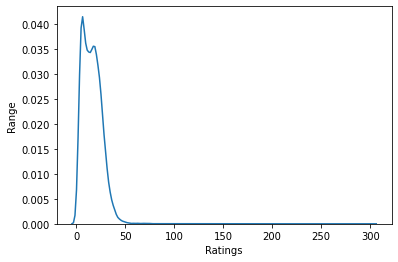

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot
sns.kdeplot(hour_wise)

plt.xlabel('Ratings')
plt.ylabel('Range')

plt.show()

<Axes: >

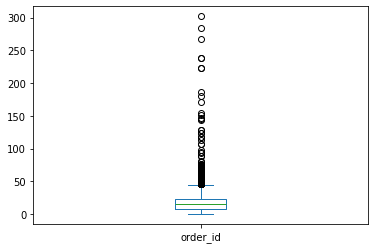

In [91]:
hour_wise.plot(kind='box')

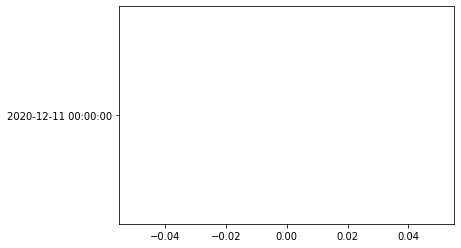

<Axes: xlabel='order_id'>

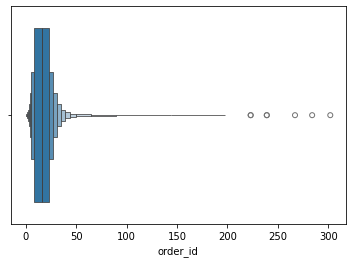

In [95]:
sns.boxenplot(x=hour_wise)